# <font style = "color:rgb(50,120,229)"> QR Code Detector </font>

## <font style = "color:rgb(50,120,229)"> Overview </font>

In the world where every other person carries an android phone or iPhone, QR Codes have gained a lot of popularity. The amount of information that these small and strange looking codes can carry is huge. Whether it's a URL, or a coupon code, or a person's PayTM account details, or a package's information, these codes can store it all. 

QR Code (Quick Response Code) were first designed in **1994** for automotive industry in Japan and since then they have left their mark in about every sector.

## <font style = "color:rgb(50,120,229)"> Aim </font>

In this project, we will implement a **QR Code Detector and Decoder** using **OpenCV** from scratch. We will then run our QR Code Detector on a sample image attached below.

![OpenCV ID Card](./IDCard-Satya.png)

## <font style = "color:rgb(50,120,229)">Additional Exercise </font>

1. Create your own **OpenCV ID Card** (unofficial). You can use the following template as reference.

![OpenCV ID Card Template](./IDCard-Template.png)

The QR Code should contain the following details:

```
Name: Your name will come here, ID: a random numeric string
```

Use the QR Code Detector to detect the QR Code on your ID card. Also try out different image processing techniques you have learnt so far in the course, for example, image blurring to blur the ID Card photo and see how it affects the performance of your QR Code Detector. Share your findings with other students on Discussion Forum.

2. Collect 5 photos of QR Codes that you have come across in your day-to-day life. Use our QR Code Detector to detect and decode the QR Code in the images. Don't forget to discuss your results and findings with other students in the discussion forum!

## <font style = "color:rgb(50,120,229)"> Outline </font>

Now that we have discussed about the aim of this project, let's see what are the main steps to be followed in this project.

1. Read image
2. Detect QR Code in the image
3. Draw bounding box around the detected QR Code
4. Print the decoded text
5. Save and display the result image

## <font style = "color:rgb(50,120,229)"> OpenCV Functions to Use </font>

First let's see what major OpenCV Functions you are going to use (or can use) in this project.

1. **Reading and writing image**: `cv2.imread()`, `cv2.imwrite()`
2. **Write text on image**: `cv2.putText()`
3. **Draw a line on image**: `cv2.line()`
4. **QR Detection**: `cv2.QRCodeDetector()`, `detectAndDecode()`

![Expected Result](./QRCode-Expected-Output.png)

# <font color='blue'>Step 1: Read Image</font> 

In [13]:
%matplotlib inline

# Import modules
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np

In [14]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [15]:
DATA_PATH

'../resource/lib/publicdata/'

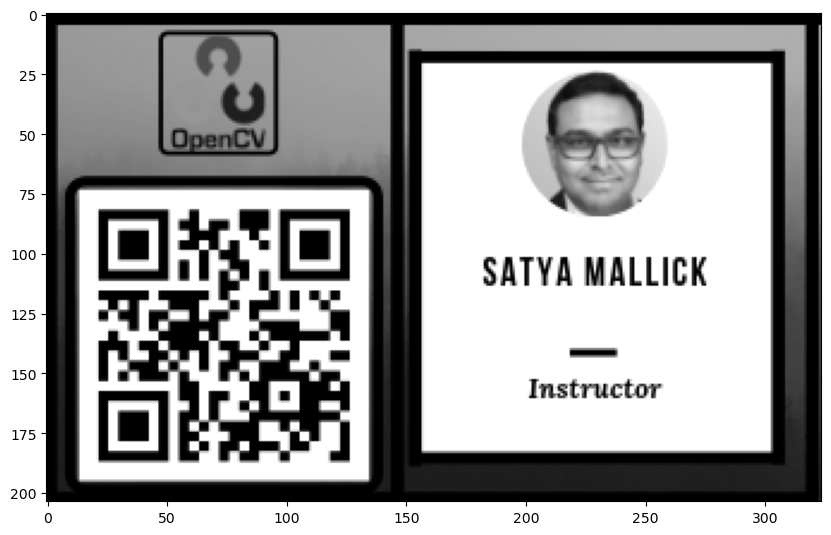

In [16]:
# Image Path
imgPath = DATA_PATH+"images/IDCard-Satya.png"

# Read Image
image = cv2.imread(imgPath)  # Reads the image as a NumPy array
image_copy=image.copy()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert image to gray scale
plt.imshow(gray_image)

In [17]:
imgPath

'../resource/lib/publicdata/images/IDCard-Satya.png'

# <font color='blue'>Step 2: Detect QR Code in the Image</font>

In [18]:
# Create a QRCodeDetector Object
# Variable name should be qrDecoder

qrDecoder=cv2.QRCodeDetector()
###

# Detect QR Code in the Image
# Output should be stored in
# opencvData, bbox, rectifiedImage
# in the same order

opencvData, bbox, rectifiedImage = qrDecoder.detectAndDecode(gray_image)

# Check if a QR Code has been detected
if opencvData != None:
    print("QR Code Detected")
else:
    print("QR Code NOT Detected")

QR Code Detected


In [22]:
bbox.shape
#bbox

(1, 4, 2)

# <font style = "color:rgb(50,120,229)"> Step 3: Draw bounding box around the detected QR Code </font>

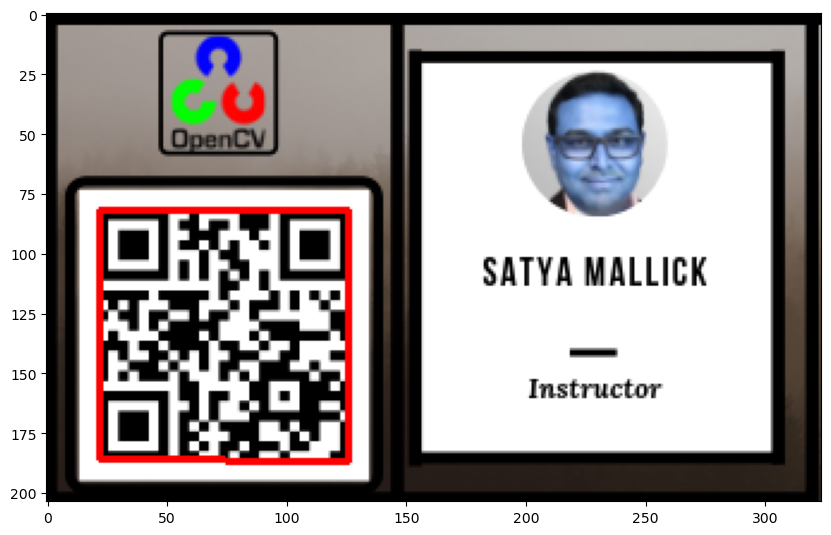

In [19]:
n = len(bbox)

# Draw the bounding box
if n >0:
#    pt1 = tuple(int(i) for i in bbox[0][0])
#    pt2 = tuple(int(i) for i in bbox[0][2])
#    cv2.rectangle(gray_image, pt1, pt2, (0, 0, 255), 3)

#    plt.imshow(gray_image)
#    plt.show()
    top_left=bbox[0][0].astype(int)
    top_right=bbox[0][1].astype(int)
    bottom_right=bbox[0][2].astype(int)
    bottom_left=bbox[0][3].astype(int)

# Draw the rectangle using cv2.line()
color = (255, 0, 0)  # Green color
thickness = 2        # Line thickness

cv2.line(image_copy, top_left, top_right, color, thickness)  # Top edge
cv2.line(image_copy, top_right, bottom_right, color, thickness)  # Right edge
cv2.line(image_copy, bottom_right, bottom_left, color, thickness)  # Bottom edge
cv2.line(image_copy, bottom_left, top_left, color, thickness)  # Left edge
plt.imshow(image_copy)
plt.show()

In [8]:
print(bbox.shape)
bbox


(1, 4, 2)


array([[[ 22.     ,  82.     ],
        [126.     ,  82.     ],
        [126.     , 187.35065],
        [ 22.     , 186.     ]]], dtype=float32)

# <font style = "color:rgb(50,120,229)"> Step 4: Print the Decoded Text </font>

In [9]:
# Since we have already detected and decoded the QR Code
# using qrDecoder.detectAndDecode, we will directly
# use the decoded text we obtained at that step (opencvdata)

print("QR Code Detected!")
name,id=opencvData.split(',')
print(f"{name} - {id}")



QR Code Detected!
Name: Satya -  ID: 1234


#  <font color='blue'>Step 5: Save and display the result image </font>

In [10]:
# Write the result image
resultImagePath = "QRCode-Output2.png"
cv2.imwrite(resultImagePath,image_copy)

True

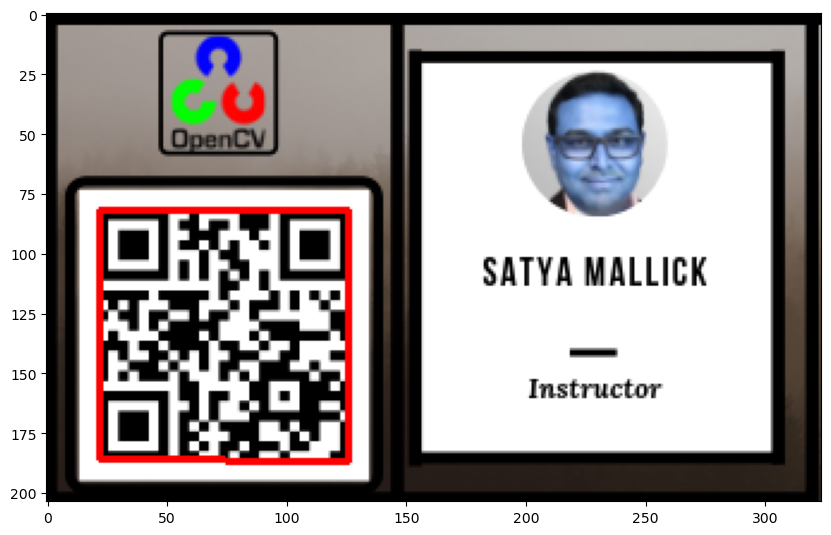

In [11]:
# Display the result image
img=cv2.imread(resultImagePath)
plt.imshow(img)

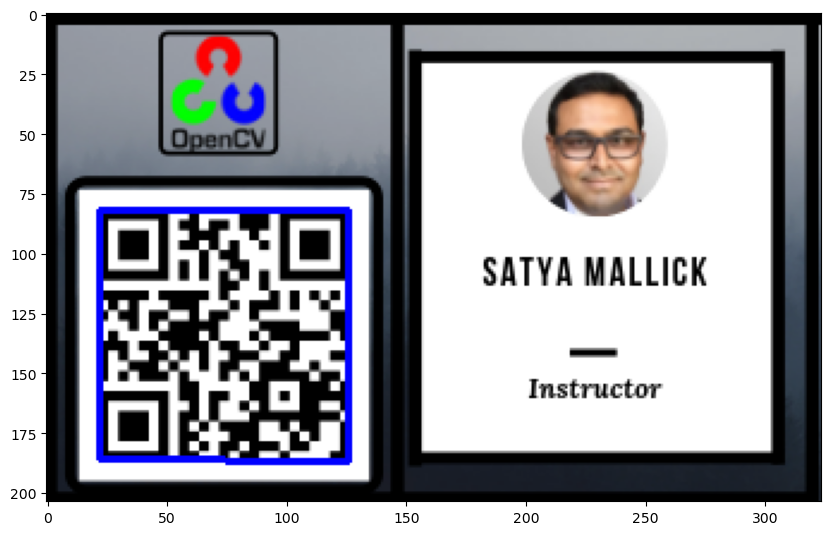

In [12]:
# OpenCV uses BGR whereas Matplotlib uses RGB format
# So convert the BGR image to RGB image
# And display the correct image

plt.imshow(img[:,:,::-1])

**<center>opencvData, bbox, rectifiedImage = qrDecoder.detectAndDecode(gray_image)</center>**

This line of code uses OpenCV's QRCodeDetector to detect and decode a QR code in a grayscale image. Here's a breakdown of what each part of the code does:

## 1. Function: qrDecoder.detectAndDecode(gray_image)
This function combines two tasks:

1. **Detects**: Finds a QR code in the given image.
2. **Decodes**: Reads and extracts the data from the QR code.

- **Input**:

    - **gray_image**: A grayscale image (NumPy array) in which the QR code is to be detected and decoded.
    
- **Outputs**: The function returns three values:

1. opencvData: The decoded data as a string (or an empty string if no QR code is detected).
2. bbox: The bounding box of the detected QR code (coordinates of the four corners) or None if no QR code is detected.
3. rectifiedImage: A rectified (straightened and cropped) version of the QR code or None if no QR code is detected.

## 2. Output Variables Explained

- **opencvData**:

    - Contains the information encoded in the QR code (e.g., text, URL, etc.).
    - Example: "https://example.com" if the QR code encodes a website.

- **bbox**:

    - A NumPy array of shape (4, 1, 2) representing the coordinates of the four corners of the QR code.
    
- **Exemple**:

In [ ]:
array([[[100, 200]],
       [[200, 200]],
       [[200, 300]],
       [[100, 300]]], dtype=float32)

    - Each coordinate is in (x, y) format.

- **rectifiedImage**:

    - A cropped and perspective-corrected image of the QR code.
    - Useful if you need a clean image of the QR code for further analysis or storage.

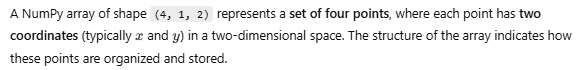

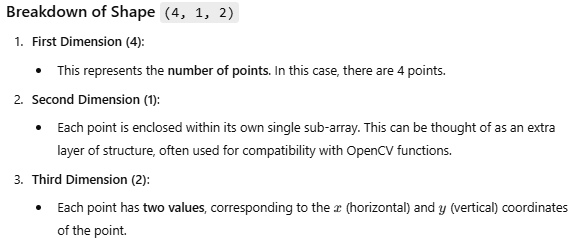

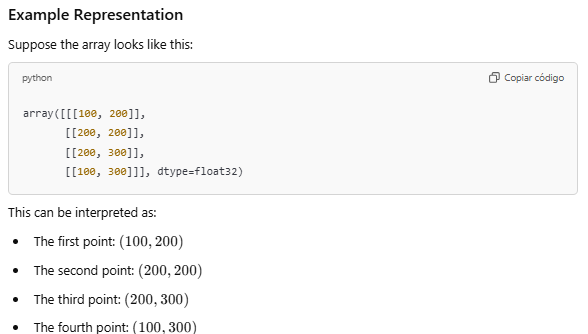

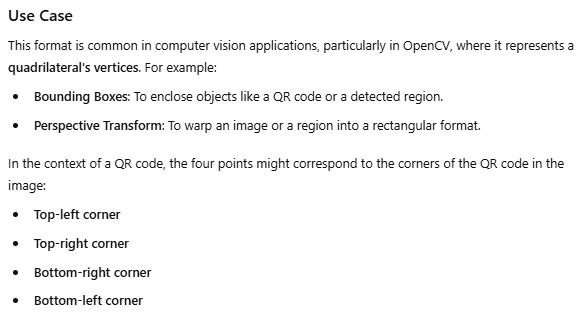

**Converting or Simplifying**

If you need the coordinates in a simpler format (e.g., a list of tuples), you can reshape or extract them:

In [ ]:
# Given a NumPy array of shape (4, 1, 2)
bbox = array([[[100, 200]],
              [[200, 200]],
              [[200, 300]],
              [[100, 300]]], dtype=float32)

# Reshape or convert to a list of (x, y) tuples
points = bbox.reshape(-1, 2)  # Shape becomes (4, 2)
print(points)
# Output: [[100. 200.]
#          [200. 200.]
#          [200. 300.]
#          [100. 300.]]

# Or convert to a list of tuples
point_list = [tuple(point) for point in points]
print(point_list)
# Output: [(100.0, 200.0), (200.0, 200.0), (200.0, 300.0), (100.0, 300.0)]


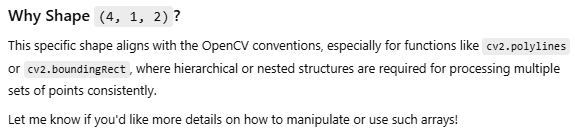

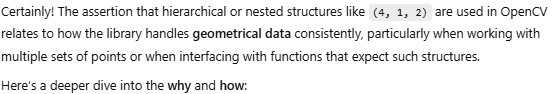

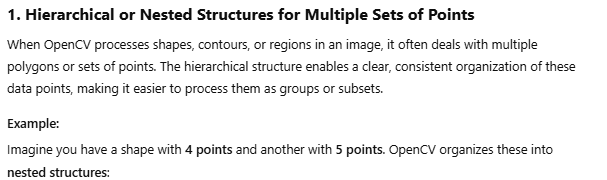

In [ ]:
[
    [[[x1, y1]], [[x2, y2]], [[x3, y3]], [[x4, y4]]],  # First shape (4 points)
    [[[x5, y5]], [[x6, y6]], [[x7, y7]], [[x8, y8]], [[x9, y9]]]  # Second shape (5 points)
]


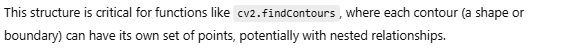

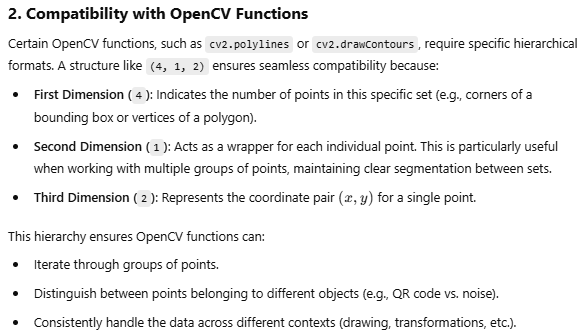

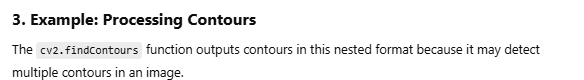

In [ ]:
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


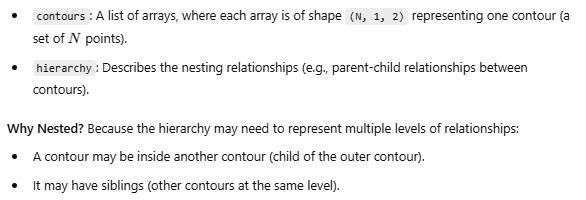

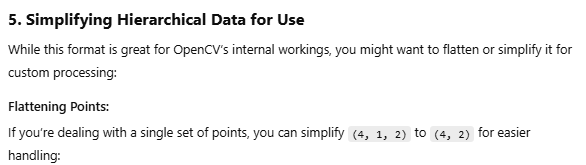

In [ ]:
# Given bbox of shape (4, 1, 2)
bbox = array([[[100, 200]],
              [[200, 200]],
              [[200, 300]],
              [[100, 300]]], dtype=float32)

# Reshape to a simpler structure
points = bbox.reshape(-1, 2)  # Result: [[100, 200], [200, 200], [200, 300], [100, 300]]


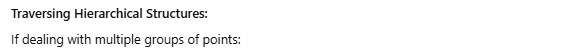

In [ ]:
for contour in contours:
    for point in contour:
        x, y = point[0]  # Extract x, y from shape (1, 2)
        print(f"Point: ({x}, {y})")


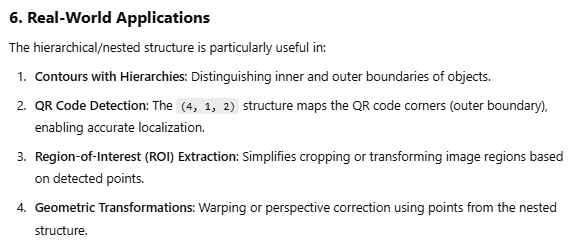

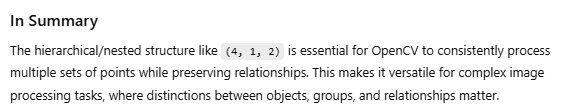

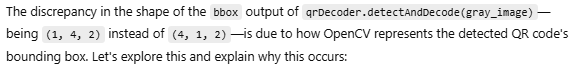

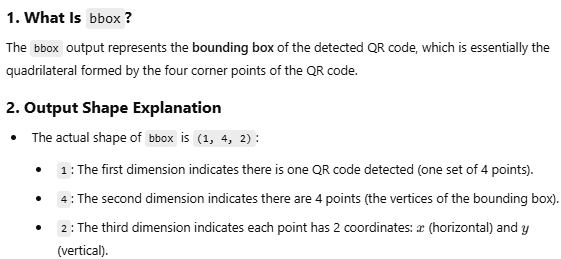

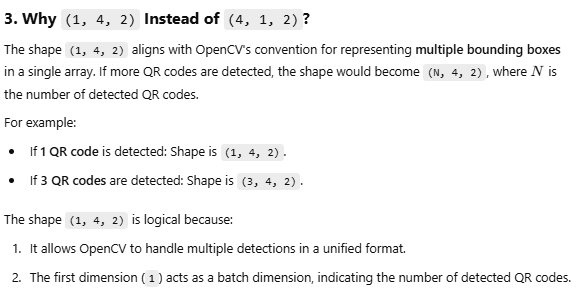

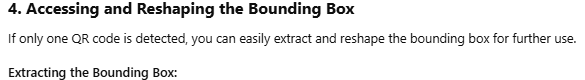

In [ ]:
# Assuming bbox has shape (1, 4, 2)
if bbox is not None:
    single_bbox = bbox[0]  # Extract the first QR code's bounding box
    print(single_bbox)  # Shape: (4, 2)

In [ ]:
flattened_bbox = bbox.reshape(-1, 2)  # Shape: (4, 2)
print(flattened_bbox)

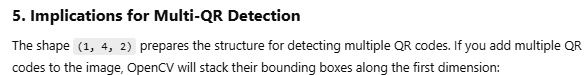

In [ ]:
# Example: bbox with multiple QR codes detected
# Shape: (N, 4, 2) for N QR codes
bbox = array([
    [[x1, y1], [x2, y2], [x3, y3], [x4, y4]],  # QR code 1
    [[x5, y5], [x6, y6], [x7, y7], [x8, y8]]   # QR code 2
])

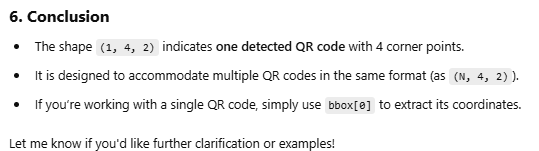

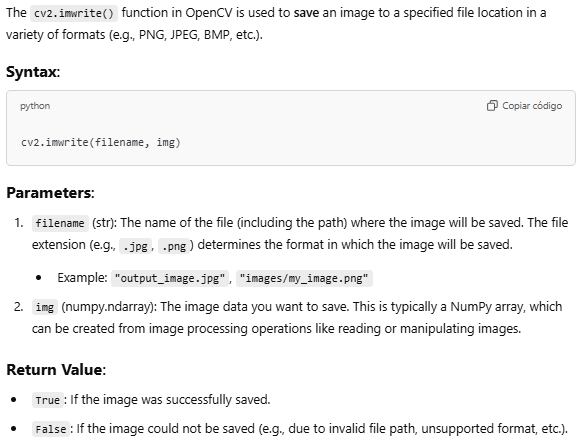

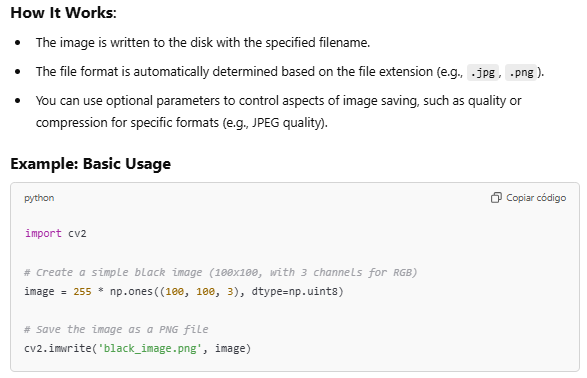

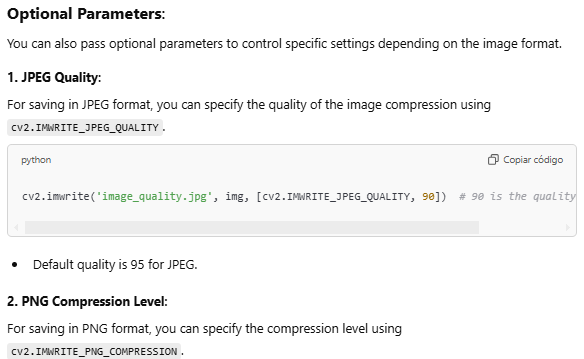

In [ ]:
cv2.imwrite('image_compressed.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 3])  # 0-9, where 9 is highest compression


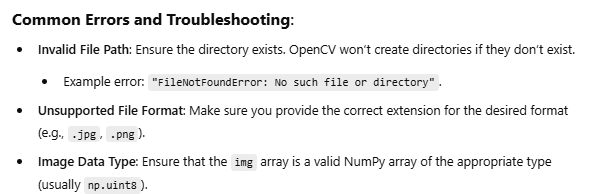

In [ ]:
import cv2
import numpy as np

# Create a simple image
image = np.zeros((200, 200, 3), dtype=np.uint8)
image[50:150, 50:150] = [255, 0, 0]  # Add a red square to the image

# Save the image as JPEG with 90% quality
cv2.imwrite('output_image.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, 90])

# Save the image as PNG with compression level 5
cv2.imwrite('output_image.png', image, [cv2.IMWRITE_PNG_COMPRESSION, 5])


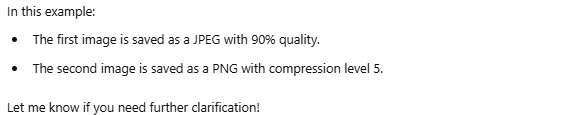